In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [2]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [3]:
data1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std, 
                   random_state=41)
d1 = data1[0]
df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,3.839778,-3.744640,6.639862,-3.246356
1,-5.508689,-9.934356,4.657342,-9.060224
2,10.367225,-0.963893,-0.132117,-4.767791
3,8.691345,-2.295385,-3.801147,-4.694300
4,-5.803683,-3.929072,-0.291883,-6.090291


In [4]:
from itertools import combinations
lst_vars=list(combinations(df1.columns,2))
len(lst_vars)

6

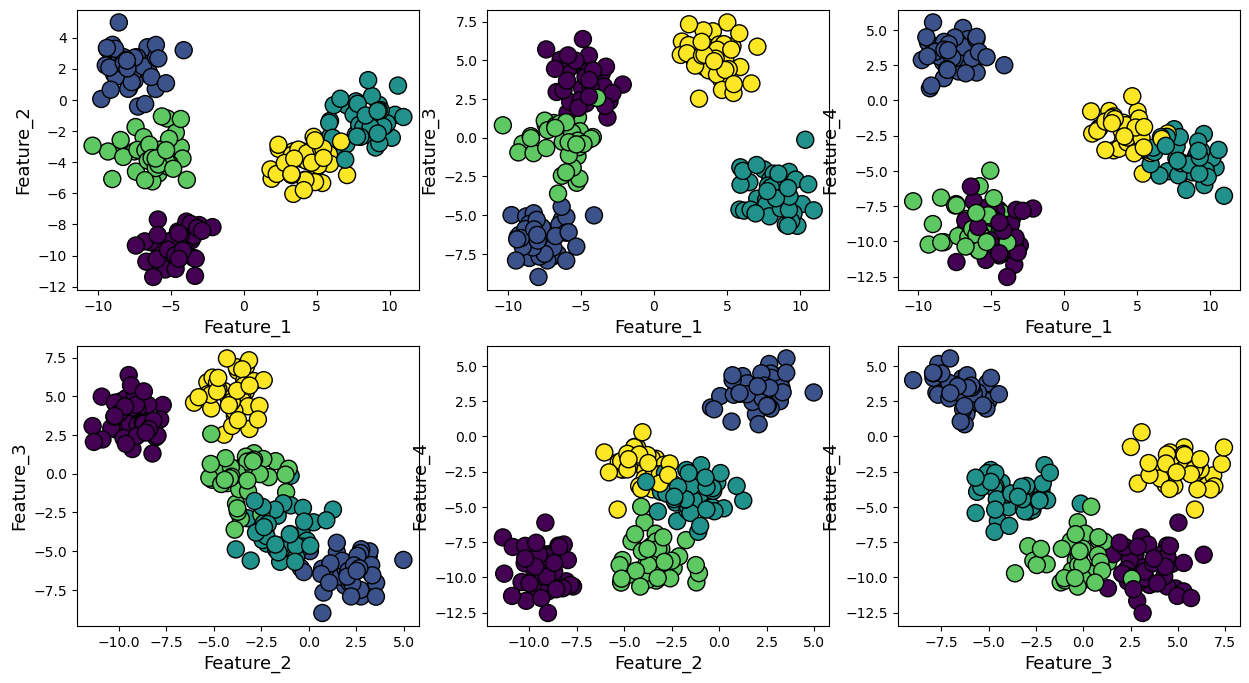

In [5]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=data1[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

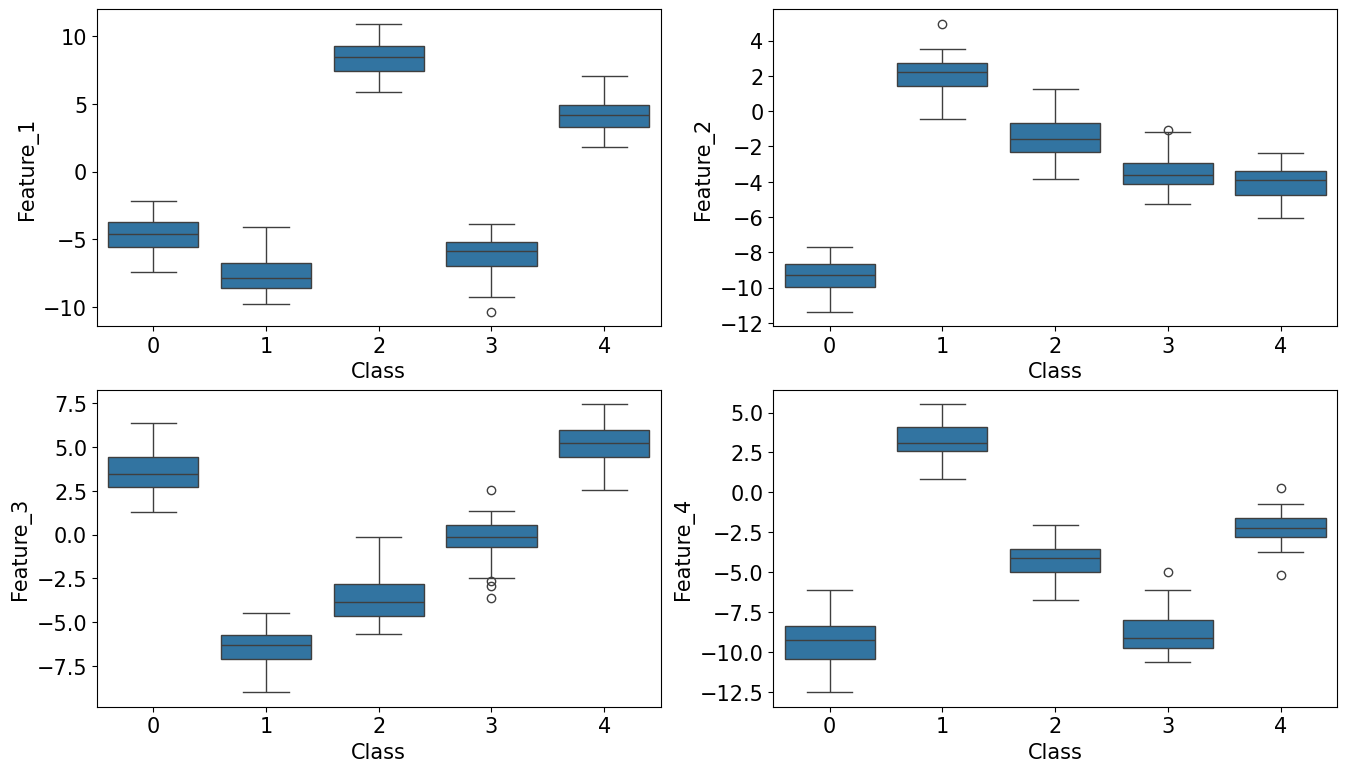

In [6]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df1[c],x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)

In [7]:
from sklearn.cluster import KMeans

In [8]:
# данные кластера
X=df1
# данные метки кластера
y=data1[1]

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [12]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, n_init = 'auto', random_state=42).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
#     print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
#     print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -34.330837523539984
Silhouette score for number of cluster(s) 2: 0.4293608696381843
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -14.509017009888538
Silhouette score for number of cluster(s) 3: 0.5876401470096159
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -7.237877315968747
Silhouette score for number of cluster(s) 4: 0.6590815407810457
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -3.415556710462672
Silhouette score for number of cluster(s) 5: 0.6870158696460237
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -3.258152128396529
Silhouette score for number of cluster(s) 6: 0.5805729526975996
---------

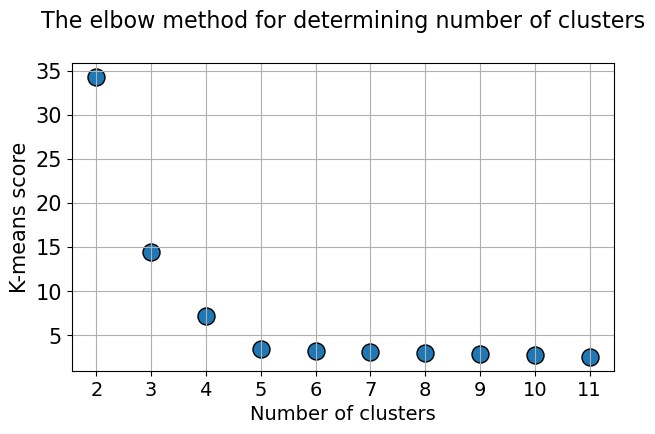

In [13]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

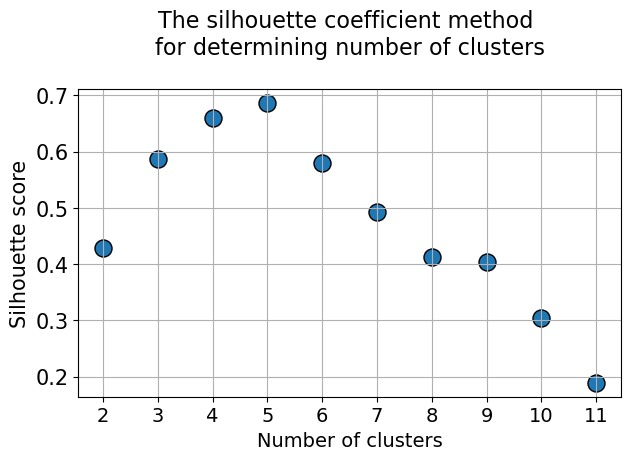

In [14]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

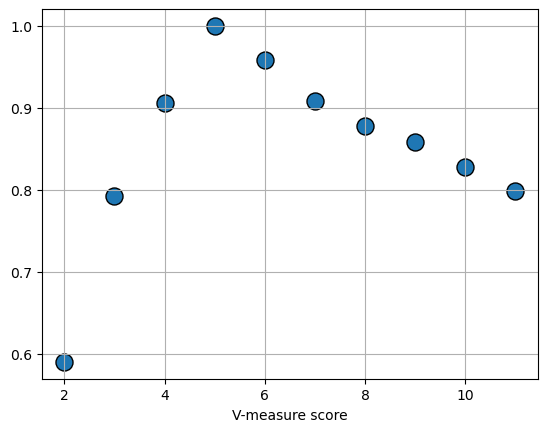

In [72]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

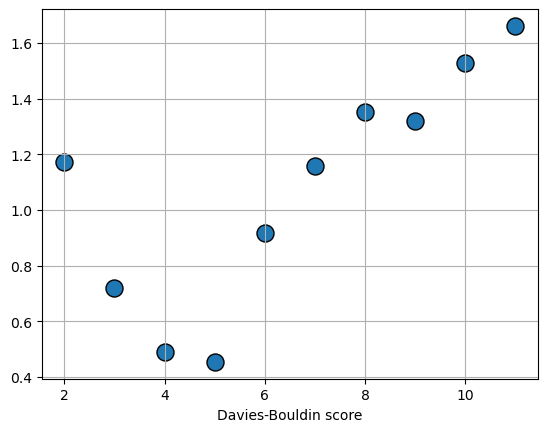

In [73]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()